In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [37]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [38]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set : #FOR A BATCH OF 32
    print(x,x.shape)      # x image , x.shape (batch_size, height, width, color mode)
    print(y, y.shape)     # y label,  y.shape  (batch_size, num_classes).
    break

tf.Tensor(
[[[[156.5  142.5  141.5 ]
   [156.   142.   141.  ]
   [158.   144.   143.  ]
   ...
   [176.75 167.75 172.75]
   [171.75 162.75 167.75]
   [173.25 164.25 169.25]]

  [[148.   134.   133.  ]
   [147.25 133.25 132.25]
   [149.   135.   134.  ]
   ...
   [172.75 163.75 168.75]
   [173.5  164.5  169.5 ]
   [174.5  165.5  170.5 ]]

  [[155.5  141.5  140.5 ]
   [153.   139.   138.  ]
   [152.   138.   137.  ]
   ...
   [177.   168.   173.  ]
   [178.   169.   174.  ]
   [173.5  164.5  169.5 ]]

  ...

  [[161.25 151.25 159.25]
   [150.5  140.5  148.5 ]
   [150.25 140.25 148.25]
   ...
   [193.25 188.25 194.25]
   [204.25 199.25 205.25]
   [198.75 193.75 199.75]]

  [[160.75 150.75 158.75]
   [155.25 145.25 153.25]
   [160.5  150.5  158.5 ]
   ...
   [191.75 186.75 192.75]
   [196.25 191.25 197.25]
   [196.5  191.5  197.5 ]]

  [[151.   141.   149.  ]
   [157.   147.   155.  ]
   [161.25 151.25 159.25]
   ...
   [204.75 199.75 205.75]
   [214.25 209.25 215.25]
   [191.   186.   19

In [18]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [39]:
cnn = tf.keras.models.Sequential()

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [46]:
cnn.add(tf.keras.layers.Flatten())

In [47]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [48]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [49]:
#output layer
cnn.add(Dense(units=38,activation='softmax'))

In [51]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 181s 76ms/step - accuracy: 0.4076 - loss: 2.1035 - val_accuracy: 0.8451 - val_loss: 0.4976
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.8445 - loss: 0.4959 - val_accuracy: 0.9157 - val_loss: 0.2669
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9074 - loss: 0.2826 - val_accuracy: 0.9351 - val_loss: 0.1998
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9369 - loss: 0.1967 - val_accuracy: 0.9464 - val_loss: 0.1697
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9524 - loss: 0.1409 - val_accuracy: 0.9619 - val_loss: 0.1180
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9651 - loss: 0.1077 - val_accuracy: 0.9521 - val_loss: 0.1664
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9700 - loss: 0.0913 - val_accuracy: 0.9582 - val_loss: 0.1338
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 

In [54]:
train_loss,train_acc=cnn.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.9842 - loss: 0.0480


In [56]:
print(train_loss,train_acc)

0.04292933642864227 0.9861868023872375


In [57]:
#model evaluation on validation set
val_loss,val_acc=cnn.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9594 - loss: 0.1375


In [58]:
print(val_loss,val_acc)

0.12999680638313293 0.9622695446014404


In [59]:
cnn.save('trained_plant_disease_model.keras')

In [60]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6121630072593689,
  0.8655665516853333,
  0.9163382649421692,
  0.9425848126411438,
  0.9561988711357117,
  0.9661142230033875,
  0.9717333912849426,
  0.976456344127655,
  0.9801266193389893,
  0.9832847118377686],
 'loss': [1.3174453973770142,
  0.4219810962677002,
  0.25532764196395874,
  0.17631322145462036,
  0.1296606808900833,
  0.10474885255098343,
  0.08523716032505035,
  0.07072948664426804,
  0.0614752322435379,
  0.0521521121263504],
 'val_accuracy': [0.8450944423675537,
  0.9156612753868103,
  0.9351240396499634,
  0.9463919997215271,
  0.9618711471557617,
  0.9521397948265076,
  0.958172082901001,
  0.9477577805519104,
  0.9637491703033447,
  0.9622695446014404],
 'val_loss': [0.4975932836532593,
  0.26687827706336975,
  0.1998019516468048,
  0.16973157227039337,
  0.11802516877651215,
  0.16635052859783173,
  0.13381265103816986,
  0.1943368762731552,
  0.13094620406627655,
  0.12999677658081055]}

In [61]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [62]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


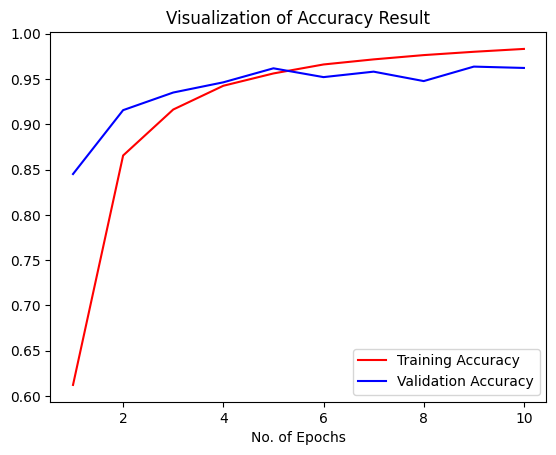

In [63]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [64]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [65]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [66]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step


In [68]:
y_pred

array([[9.9999440e-01, 3.0835408e-06, 3.1718372e-10, ..., 6.9556237e-15,
        1.8744195e-13, 2.6563631e-14],
       [9.9998260e-01, 8.7740564e-06, 1.9658097e-09, ..., 7.7640680e-12,
        2.1863598e-11, 7.4919107e-12],
       [1.0000000e+00, 5.2958562e-09, 1.5883629e-11, ..., 6.1419517e-17,
        1.4476738e-13, 2.8671611e-14],
       ...,
       [2.9695528e-07, 1.3859977e-08, 1.2188501e-06, ..., 1.4865586e-08,
        4.2914921e-09, 9.9964213e-01],
       [6.9807632e-10, 3.7113355e-12, 4.6537751e-10, ..., 3.4851556e-11,
        3.7379783e-11, 9.9999654e-01],
       [3.2395641e-15, 2.0874341e-16, 4.1061116e-15, ..., 7.0618063e-16,
        2.3785493e-14, 9.9978346e-01]], dtype=float32)

In [69]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [70]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [71]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[481,  12,   0, ...,   0,   1,   0],
       [  0, 491,   0, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   1, ...,   0,   0, 450]])

In [73]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.95      0.97       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.97       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.99      0.90      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.88      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.99      0.

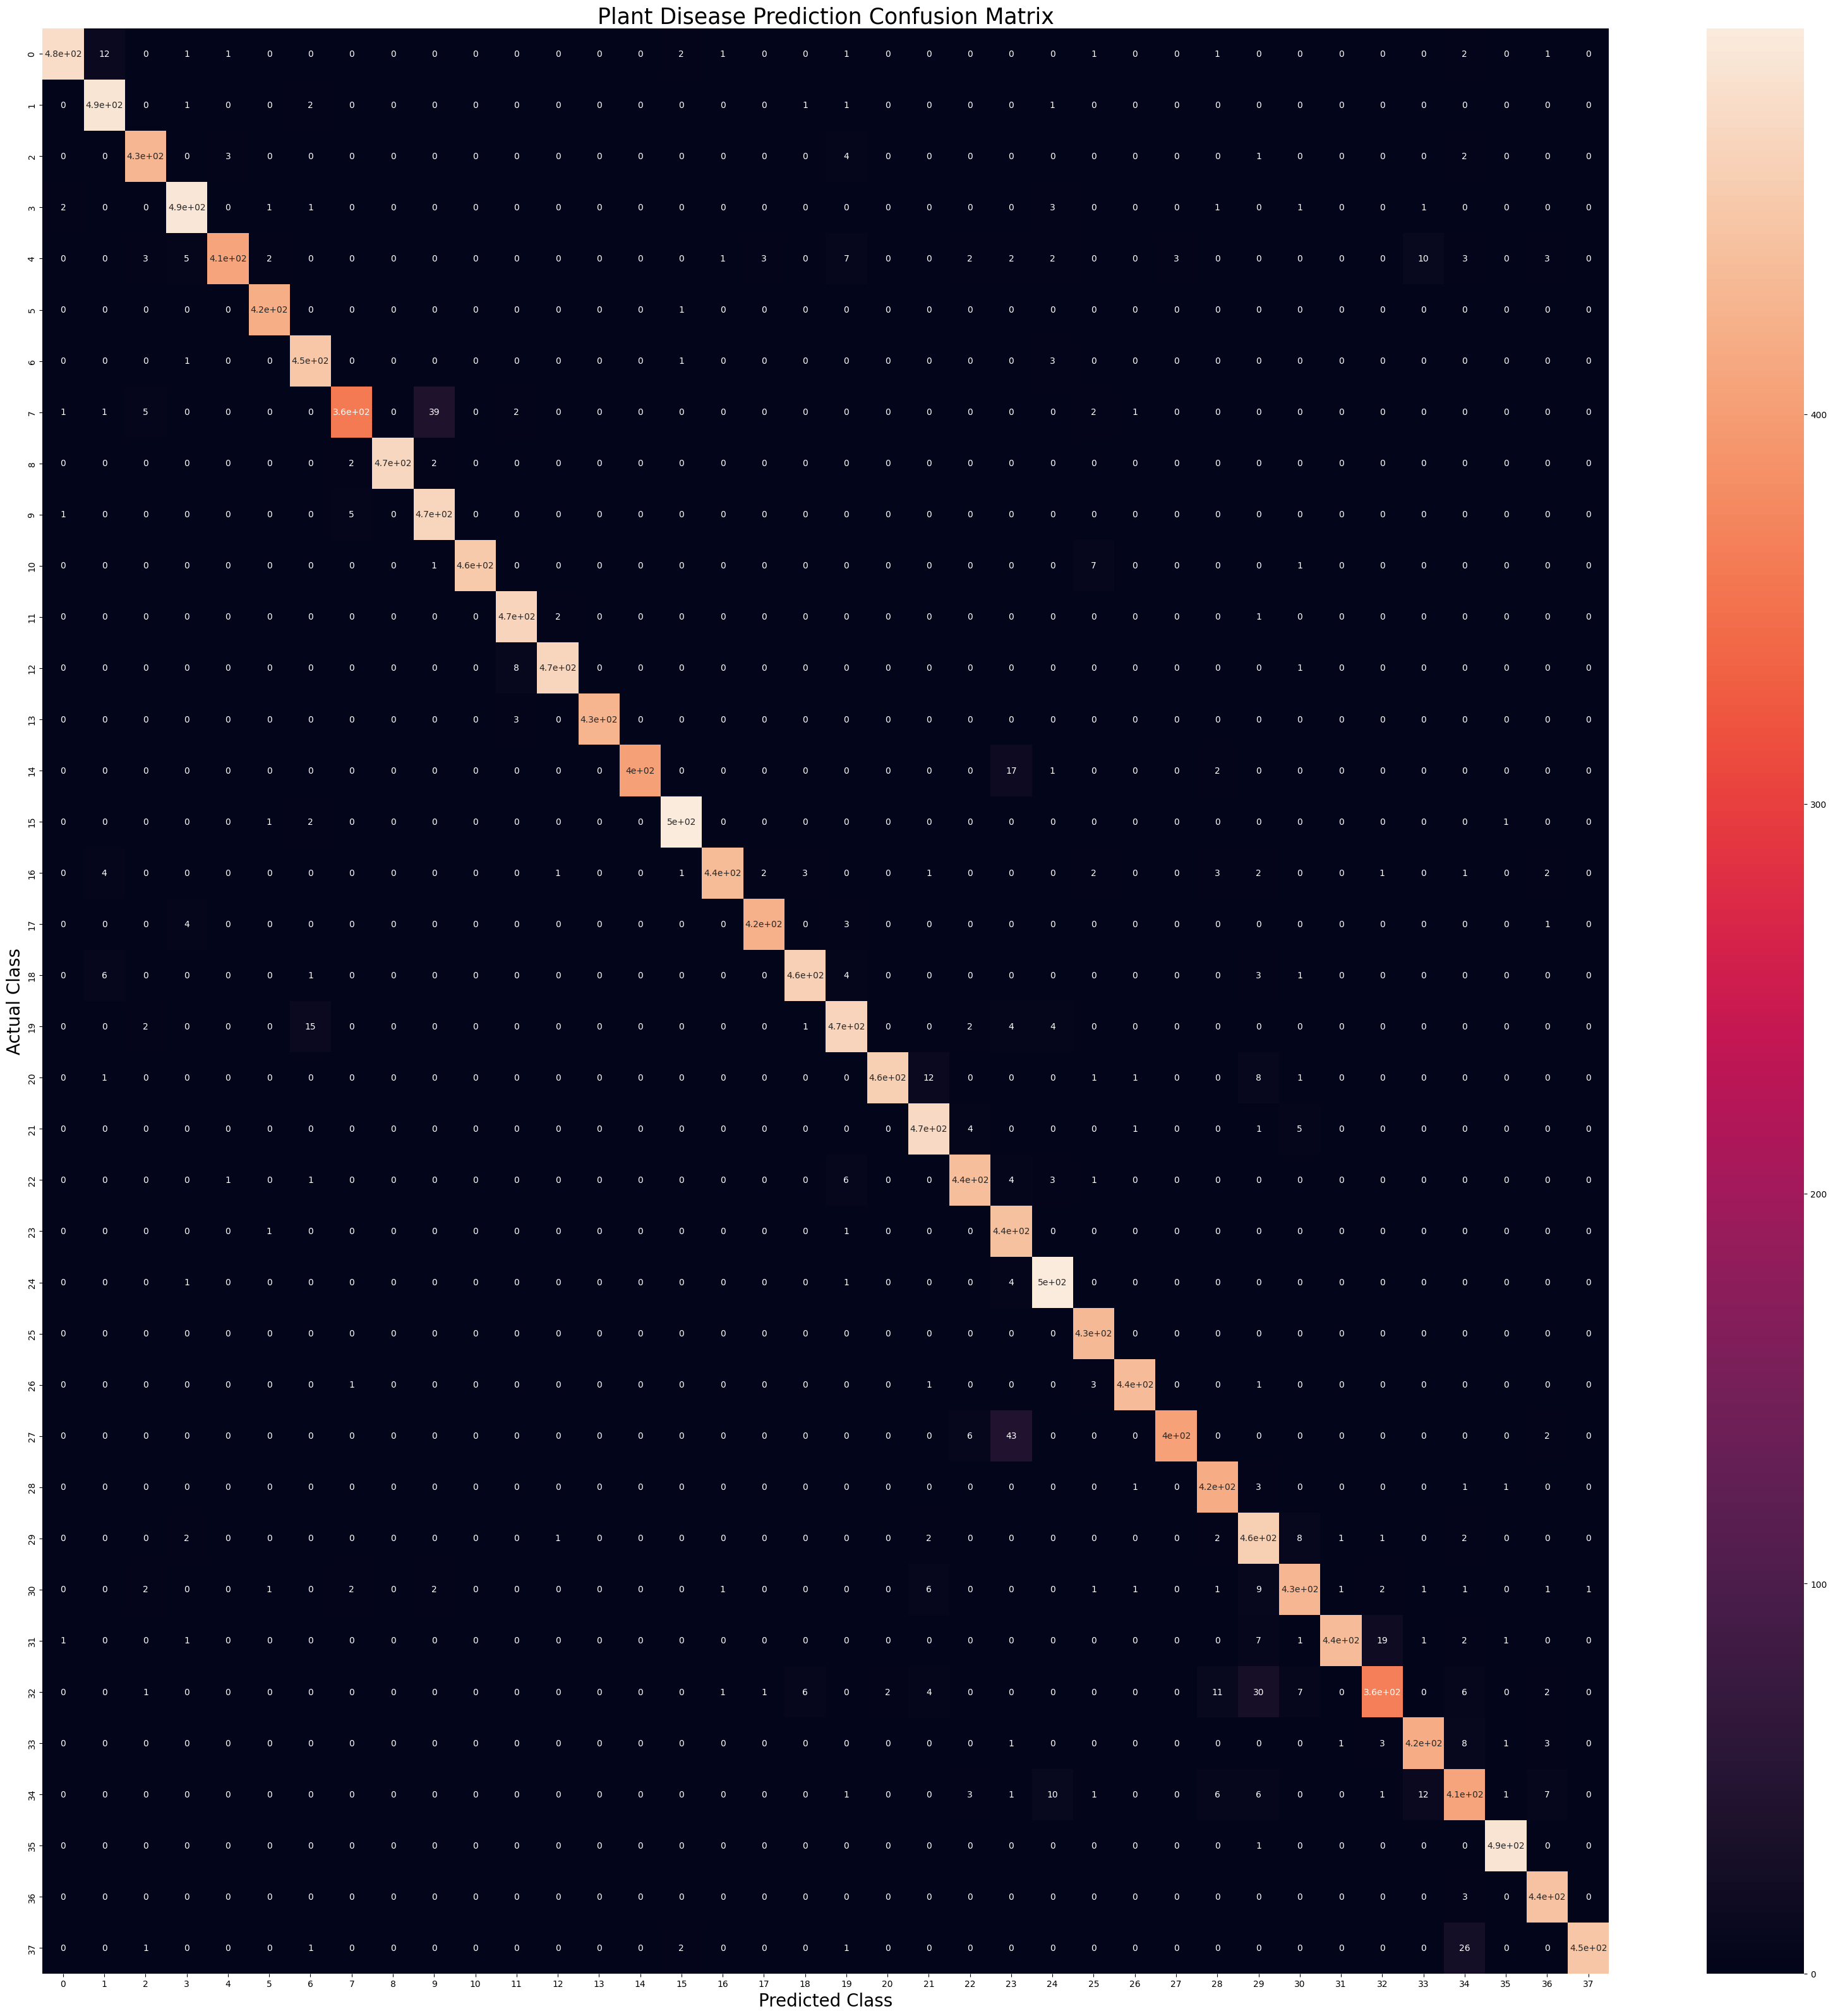

In [77]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()